In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import seaborn as sns
import pandas as pd
from pathlib import Path

import sys
sys.path.append("../..")
from xlstm_scaling_laws.load_data.inference_time import load_inference_time_data

In [2]:
# number of measurements, and number of datapoints for fit
ttft_df, step_time_df = load_inference_time_data("xlstm")
print(ttft_df.shape, step_time_df.shape)
print(ttft_df.dropna().shape, step_time_df.dropna().shape)

(780, 19) (780, 19)
(396, 19) (391, 19)


In [3]:
ttft_df.columns

MultiIndex([(        'model',                  'model_type'),
            (        'model',                   'model_tag'),
            ( 'input_params',                   'batchsize'),
            ( 'input_params',                     'prefill'),
            ('measured_data',                  'num_params'),
            ('measured_data',        'memory_allocated_gl1'),
            ('measured_data',         'memory_reserved_gl1'),
            ('measured_data',      'memory_allocated_gl101'),
            ('measured_data',       'memory_reserved_gl101'),
            ( 'model_params',                   'num_heads'),
            ( 'model_params',               'embedding_dim'),
            ( 'model_params',                  'num_blocks'),
            ( 'model_params',               'qk_dim_factor'),
            ( 'model_params',             'ffn_proj_factor'),
            ( 'model_params', 'ffn_round_up_to_multiple_of'),
            ( 'model_params',                  'vocab_size'),
        

In [4]:
# number of measurements, and number of datapoints for fit
ttft_df, step_time_df = load_inference_time_data("llama2")
print(ttft_df.shape, step_time_df.shape)
print(ttft_df.dropna().shape, step_time_df.dropna().shape)

(780, 17) (780, 17)
(513, 17) (499, 17)


In [5]:
ttft_df, step_time_df = load_inference_time_data("xlstm")

In [6]:
ttft_df[('model', 'model_tag')].unique()

array(['xlstm_160m', 'xlstm_400m', 'xlstm_830m', 'xlstm_1.4b',
       'xlstm_2.7b', 'xlstm_7b'], dtype=object)

(100, 18000)

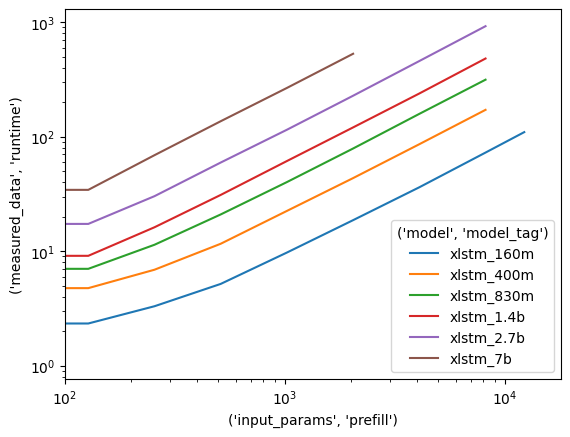

In [7]:
# ttft - plot different models with fixed batch size

bs = 8
df = ttft_df[ttft_df[("input_params", "batchsize")] == bs]

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("model", "model_tag"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)

In [8]:
df["input_params"]

,batchsize,prefill
30,8,0
31,8,128
32,8,256
33,8,512
34,8,1024
35,8,2048
36,8,4096
37,8,8192
38,8,12288
39,8,16384


/tmp/ipykernel_174002/3453333510.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = ttft_df[ttft_df[("model", "model_tag")] == model][ttft_df[("input_params", "batchsize")] < 2000]


(100, 18000)

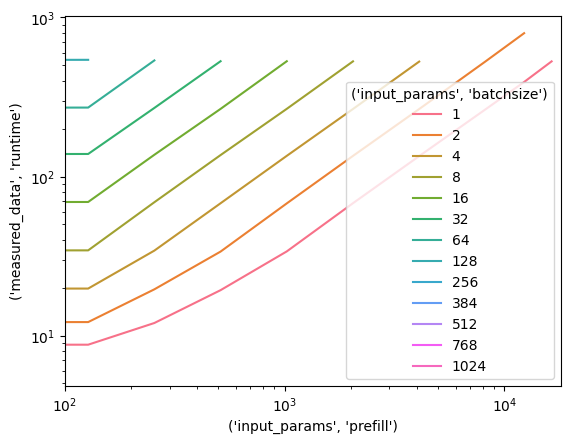

In [9]:
# ttft - plot model with different batch sizes
model = "xlstm_1.4b" 
model = "xlstm_160m"
# model = "xlstm_2.7b"
# model = "xlstm_830m"
model = "xlstm_7b"
df = ttft_df[ttft_df[("model", "model_tag")] == model][ttft_df[("input_params", "batchsize")] < 2000]
df[("input_params", "batchsize")] = df[("input_params", "batchsize")].astype(str)

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("input_params", "batchsize"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)

(100, 18000)

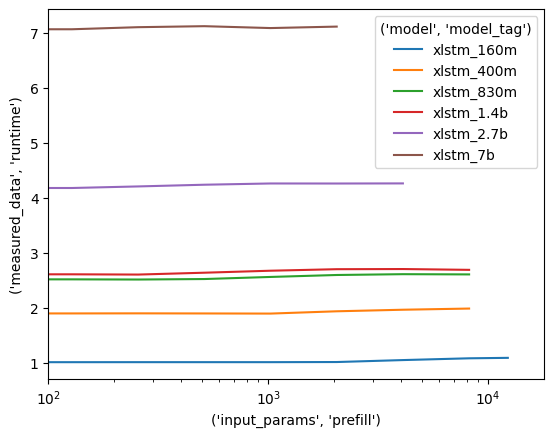

In [10]:
# step time - plot different models with fixed batch size

bs = 8
df = step_time_df[step_time_df[("input_params", "batchsize")] == bs]

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("model", "model_tag"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

# ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)

/tmp/ipykernel_174002/1556408689.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = step_time_df[step_time_df[("model", "model_tag")] == model][step_time_df[("input_params", "batchsize")] < 2000]


(100, 18000)

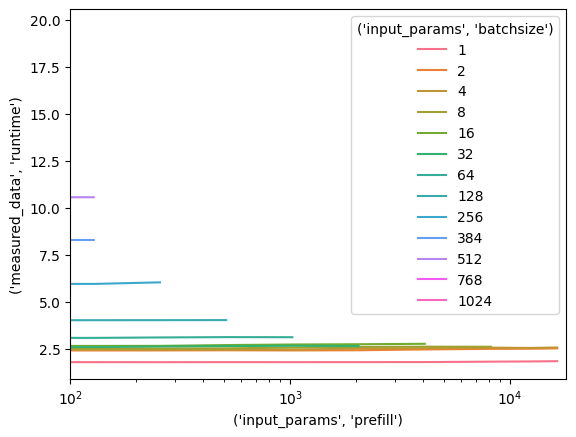

In [11]:
# step time - plot model with different batch sizes
model = "xlstm_1.4b" 
model = "xlstm_160m"
model = "xlstm_2.7b"
model = "xlstm_830m"
df = step_time_df[step_time_df[("model", "model_tag")] == model][step_time_df[("input_params", "batchsize")] < 2000]
df[("input_params", "batchsize")] = df[("input_params", "batchsize")].astype(str)

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("input_params", "batchsize"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

# ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)

In [12]:
ttft_df, step_time_df = load_inference_time_data("llama2")

In [13]:
ttft_df[('model', 'model_tag')].unique()

array(['llama2_160m', 'llama2_400m', 'llama2_830m', 'llama2_1.4b',
       'llama2_2.7b', 'llama2_7b'], dtype=object)

(100, 18000)

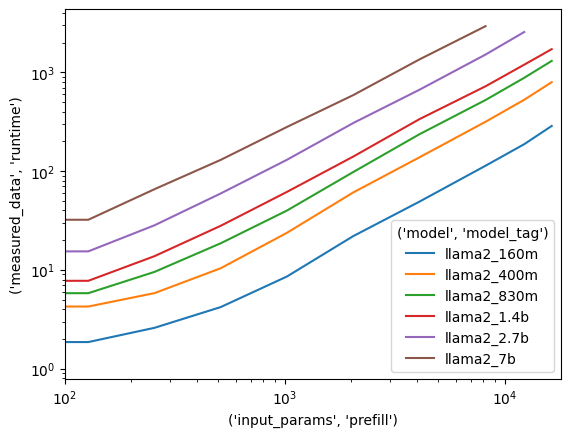

In [14]:
# ttft - plot different models with fixed batch size

bs = 8
df = ttft_df[ttft_df[("input_params", "batchsize")] == bs]

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("model", "model_tag"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)

/tmp/ipykernel_174002/3998170710.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = ttft_df[ttft_df[("model", "model_tag")] == model][ttft_df[("input_params", "batchsize")] < 2000]


(100, 18000)

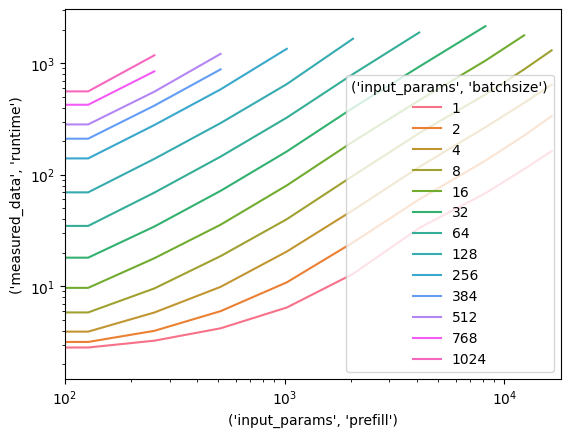

In [15]:
# ttft - plot model with different batch sizes
model = "xlstm_1.4b" 
model = "xlstm_160m"
model = "xlstm_2.7b"
model = "xlstm_830m"
model = "llama2_830m"
df = ttft_df[ttft_df[("model", "model_tag")] == model][ttft_df[("input_params", "batchsize")] < 2000]
df[("input_params", "batchsize")] = df[("input_params", "batchsize")].astype(str)

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("input_params", "batchsize"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)

(100, 18000)

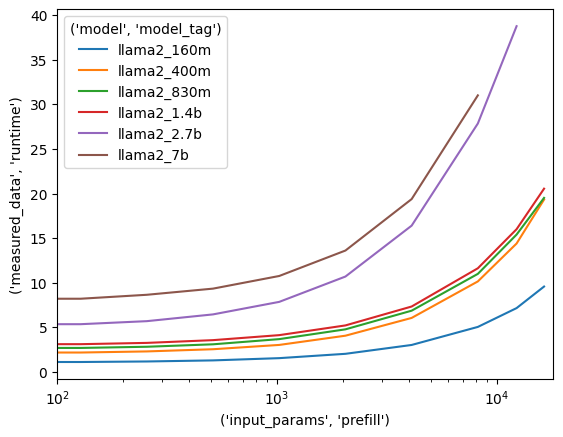

In [16]:
# step time - plot different models with fixed batch size

bs = 8
df = step_time_df[step_time_df[("input_params", "batchsize")] == bs]

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("model", "model_tag"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

# ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)

/tmp/ipykernel_174002/2694559006.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = step_time_df[step_time_df[("model", "model_tag")] == model][step_time_df[("input_params", "batchsize")] < 2000]


(100, 18000)

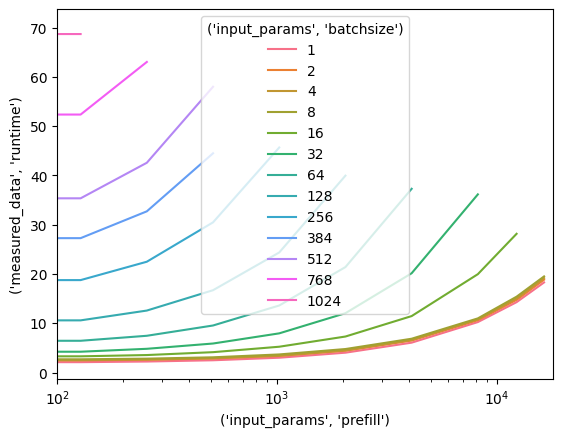

In [17]:
# step time - plot model with different batch sizes
model = "xlstm_1.4b" 
model = "xlstm_160m"
model = "xlstm_2.7b"
model = "xlstm_830m"
model = "llama2_830m"
df = step_time_df[step_time_df[("model", "model_tag")] == model][step_time_df[("input_params", "batchsize")] < 2000]
df[("input_params", "batchsize")] = df[("input_params", "batchsize")].astype(str)

ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=("input_params", "batchsize"), markers=True, dashes=False)
# ax = sns.lineplot(df, x=("input_params", "prefill"), y=('measured_data', 'runtime'), hue=('measured_data', 'num_params'), markers=True, dashes=False)

# ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(100, 18000)